# generative model of PGs 

In [1]:
from brian2 import *
%matplotlib inline
from brian2 import SpikeGeneratorGroup
import numpy as np

import random
import pandas as pd

In [2]:
N = 10
n_PGs = 10
duration = 1000*ms
PGs = {}
a = np.arange(N)

cmap = plt.cm.get_cmap("plasma")
color_dict = pd.Series({i:cmap(i/len(a)) for i,k in enumerate(a)})

for i in range(n_PGs) :
    n_indice = np.random.randint(0, N, size = 1)
    indices = random.sample(range(N), int(n_indice))
    times = np.random.rand(int(n_indice))*100*ms
    
    G = SpikeGeneratorGroup(10, indices, times)
    S = SpikeMonitor(G)
    
    run(duration)
    
    t = ([S.t/ms])
    I = S.i
    PGs[i] = (t, I)

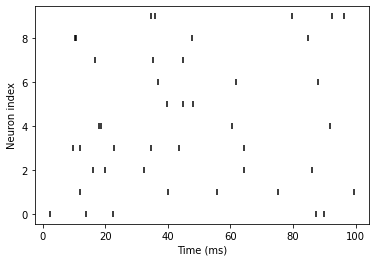

In [3]:
for i in PGs:
    plt.scatter(PGs[i][0], PGs[i][1], color = "k", marker = "|")
    xlabel('Time (ms)')
    ylabel('Neuron index');

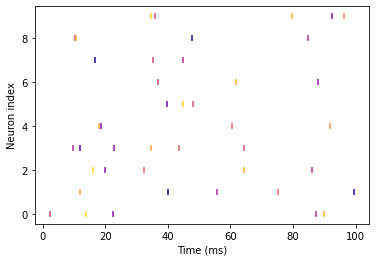

In [4]:
for i in PGs:
    plt.scatter(PGs[i][0], PGs[i][1], color = color_dict[i], marker = "|")
    xlabel('Time (ms)')
    ylabel('Neuron index');

In [105]:
last_t = []
last_i = []
for i in PGs : 
    last_t.append(PGs[i][0][-1][-1])
    last_i.append(PGs[i][1][-1])

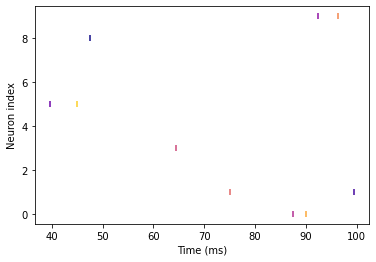

In [111]:
for i in PGs:
    plt.scatter(last_t[i], last_i[i], color = color_dict[i], marker = "|")
    xlabel('Time (ms)')
    ylabel('Neuron index');